<a href="https://colab.research.google.com/github/TruongVanDuc19146177/AI/blob/main/CNN_cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from skimage import color 
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D,Dense,Flatten

In [ ]:
(x_train,y_train) , (x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
X=x_test


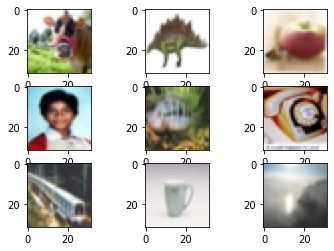

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale','aquarium fish', 'flatfish', 'ray',
           'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips','bottles',
           'bowls', 'cans', 'cups', 'plates',	'apples', 'mushrooms', 'oranges', 'pears', 
           'sweet peppers','clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 
           'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
           'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 
           'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox',
           'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm','baby', 'boy', 
           'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 
           'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 'motorcycle', 'pickup truck',
           'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']


In [ ]:
#chuyen ve so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#xu li du lieu 
x_train/=255
x_test/=255
#one hot encoding
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [ ]:
# MODEL CNN
model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# Add ANN
model.add(Flatten())
model.add(Dense(256,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(100,activation = 'softmax'))
opt = SGD(lr= 0.01, momentum = 0.9)

model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_data = (x_test,y_test), verbose = 1)
 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
391/391 [==============================] - 17s 16ms/step - loss: 4.0928 - accuracy: 0.0794 - val_loss: 3.7223 - val_accuracy: 0.1368
Epoch 2/100
391/391 [==============================] - 6s 14ms/step - loss: 3.3423 - accuracy: 0.2001 - val_loss: 3.1051 - val_accuracy: 0.2419
Epoch 3/100
391/391 [==============================] - 6s 14ms/step - loss: 2.9169 - accuracy: 0.2761 - val_loss: 2.8505 - val_accuracy: 0.2971
Epoch 4/100
391/391 [==============================] - 6s 14ms/step - loss: 2.6020 - accuracy: 0.3445 - val_loss: 2.7044 - val_accuracy: 0.3264
Epoch 5/100
391/391 [==============================] - 5s 14ms/step - loss: 2.3236 - accuracy: 0.3984 - val_loss: 2.4879 - val_accuracy: 0.3664
Epoch 6/100
391/391 [==============================] - 5s 14ms/step - loss: 2.0850 - accuracy: 0.4523 - val_loss: 2.4738 - val_accuracy: 0.3841
Epoch 7/100
391/391 [==============================] - 6s 14ms/step - loss: 1.8512 - accuracy: 0.5027 - val_loss: 2.4066 - val_accuracy

In [ ]:
#luu model 
model.save('CNN_cifar_100.h5')

In [ ]:
#danh gia model
score = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 8.5103 - accuracy: 0.3592


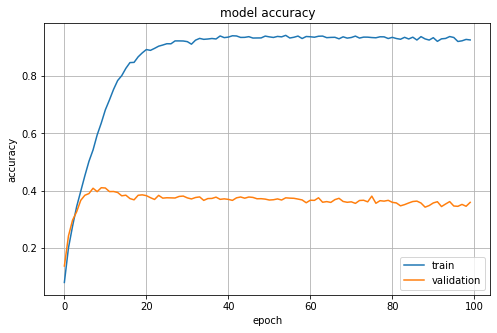

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

'lawn-mower'

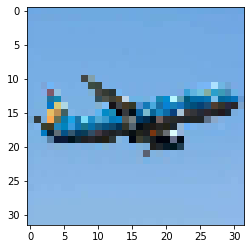

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

filename = 'maybay.jpg'

img = load_img(filename, target_size =(32,32))
plt.imshow(img)
img  = img_to_array(img)
img  = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255

label = int(np.argmax(model.predict(img), axis = 1))
classes[label]